# HyperoptのHello World的なサンプルプログラム
    ユーザが用意するのは、
    1. 最小化するための評価関数　objective（公式ではobjective）
    2. 探索空間　hyperopt_parameters（公式ではspace）

In [1]:
# sampleプログラム
# -10 < x < 10　の範囲における
# X^2が最大値となる X を見つける

from hyperopt import fmin, tpe, hp

# 探索するパラメータの定義
hyperopt_parameters = {
    'x': hp.uniform('x', -10, 10),
}

# 最小化する関数の定義
# argsには、設定した探索するパラメータが渡される
def objective(args):
    accuracy = args['x'] ** 2
    # hyperoptは最小化を返すため、最大化を求める場合は-1をかける
    return(-accuracy)

# hyperopt.fmin()により、探索空間における最小の値を探索する
best = fmin(
    # 1.最小化する関数の定義
    objective,
    # 2.探索空間(探索するパラメータのdictもしくはlist)の設定
    hyperopt_parameters,
    # 3.どのロジックを利用するか、基本的にはtpe.suggestでOK
    algo=tpe.suggest,
    # 4.iterationする回数
    max_evals=100,
)

# 最適な値のリスト
print(best)


{'x': -9.995845980951437}


## Hello Worldから一歩進んだサンプルプログラム
## 探索したデータを可視化して動作確認をする

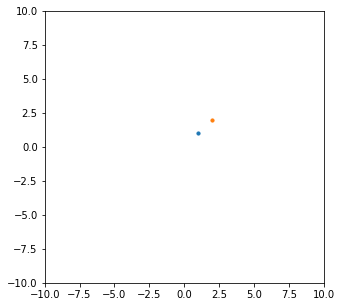

In [3]:
# グラフ描画の動作確認をしただけ
# 意味なし

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.xlim(-10.0, 10.0)
plt.ylim(-10.0, 10.0)
#plt.plot(1.0, 1.0, color="blue")
#fig = plt.figure()
#fig.add_subplot(1,1,1).scatter(1,1)
plt.scatter(1,1,s=10)
plt.scatter(2,2,s=10)

plt.show()

{'x': -9.952815673269594, 'y': -9.843809177718347}


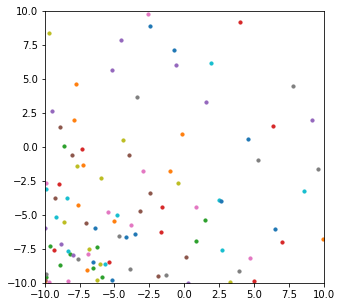

In [89]:
# sampleプログラム
# [-10 < x < 10],[-10 < y < 10]の範囲における
# x * yが最大値となる x, y を見つける

from hyperopt import fmin, tpe, hp, Trials

# 探索するパラメータの定義
hyperopt_parameters = {
    'x': hp.uniform('x', -10, 10),
    'y': hp.uniform('y', -10, 10),
}

# 最小化する関数の定義
# argsには、設定した探索するパラメータが渡される
def objective(args):
    accuracy = args['x'] * args['y']
    # hyperoptは最小化を返すため、最大化を求める場合は-1をかける
    return(-accuracy)

# 試行の過程を記録するインスタンス
trials = Trials()

# hyperopt.fmin()により、探索空間における最小の値を探索する
best = fmin(
    # 1.最小化する関数の定義
    objective,
    # 2.探索空間(探索するパラメータのdictもしくはlist)の設定
    hyperopt_parameters,
    # 3.どのロジックを利用するか、基本的にはtpe.suggestでOK
    algo=tpe.suggest,
    # 4.iterationする回数
    max_evals=100,
    # 試行の過程を記録
    trials=trials,
    # 試行の過程を出力
    verbose=1
)

# 最適な値のリスト
print(best)

# 以下、可視化
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.xlim(-10.0, 10.0)
plt.ylim(-10.0, 10.0)

# 試行結果（trials.vals['x']['y']）をプロット
for x, y in zip(trials.vals['x'], trials.vals['y']):
    plt.scatter(x, y, s=10)

plt.show()


## Hyperoptの何がいいのか？
## RandomSearchと精度を比較する

[-6.21970955385793, -9.799154754914792]


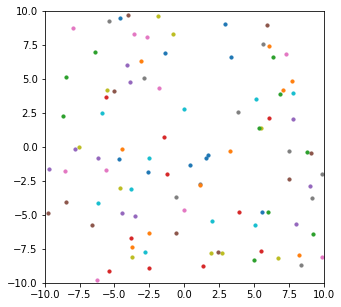

In [24]:
import numpy as np

# Hyperoptと同じ試行回数で確認する
num_iter = 100

# 一様な乱数を同個数生成する
def random_search(num_iter):
    results = []
    for _ in range(num_iter):
        rand_x = np.random.uniform(-10.0, 10.0)
        rand_y = np.random.uniform(-10.0, 10.0)
        results.append([rand_x, rand_y])
    #print(results)
    return(results)

# 乱数を生成して受け取る
results = random_search(num_iter)

# Hyperoptの評価関数と同じ（x*y）内容でソートする
best = sorted(results, key=lambda x:x[0]*x[1], reverse=True)[0]
print(best)

# 以下、可視化
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.xlim(-10.0, 10.0)
plt.ylim(-10.0, 10.0)

# 試行結果をプロット
for result in results:
    plt.scatter(result[0], result[1], s=10)

plt.show()

## Hyperoptと比較して、探索空間全体を探索しており
## 非効率かつ、最適値を見つけられていないことが確認できる

#### Hyperoptが何故効率的な探索ができるのか、学術的な情報は以下を参照
https://qiita.com/kenchin110100/items/ac3edb480d789481f134
https://qiita.com/nazoking@github/items/f67f92dc60001a43b7dc